In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import neattext.functions as nfx

In [68]:
df=pd.read_csv('emotion_dataset.csv')

In [69]:

df.head()



,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [70]:
df.shape

(34792, 2)

In [71]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [72]:
df.isnull()

,Emotion,Text
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
34787,False,False
34788,False,False
34789,False,False
34790,False,False


In [73]:
df['Emotion'].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: Emotion, dtype: int64

<Axes: >

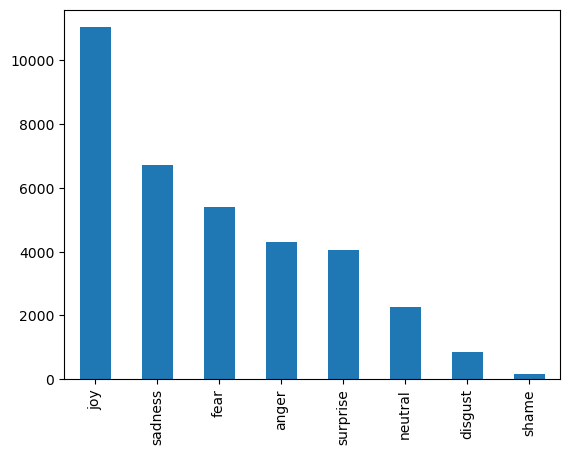

In [74]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='Emotion', ylabel='count'>

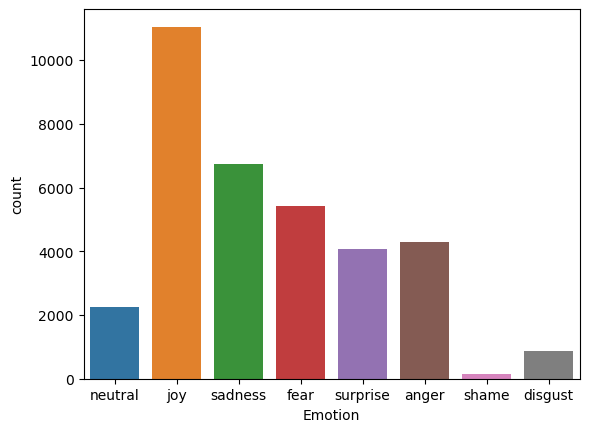

In [75]:
sns.countplot(x='Emotion',data=df)

##  Sentiment Analysis

In [76]:
from textblob import TextBlob

In [77]:
def getSentiment(text):
    blob=TextBlob(text)
    sentiment=blob.sentiment.polarity
    if sentiment > 0:
        result='Positive'
    elif sentiment < 0:
        result='Negative'
    else:
        result = 'Neutral'
    return result

In [78]:
getSentiment("i love coding")

'Positive'

In [79]:
df['Sentiment']=df['Text'].apply(getSentiment)

In [80]:
df.head()

,Emotion,Text,Sentiment
0,neutral,Why ?,Neutral
1,joy,Sage Act upgrade on my to do list for tommorow.,Neutral
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,Negative
3,joy,Such an eye ! The true hazel eye-and so brill...,Positive
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,Neutral


In [81]:
# Compare our Emotion vs Sentiment

In [82]:
df.groupby(['Emotion','Sentiment']).size()

Emotion   Sentiment
anger     Negative     1787
          Neutral      1386
          Positive     1124
disgust   Negative      325
          Neutral       249
          Positive      282
fear      Negative     1534
          Neutral      1843
          Positive     2033
joy       Negative     1682
          Neutral      3648
          Positive     5715
neutral   Negative      178
          Neutral      1523
          Positive      553
sadness   Negative     2630
          Neutral      2127
          Positive     1965
shame     Negative       46
          Neutral        50
          Positive       50
surprise  Negative      623
          Neutral      1545
          Positive     1894
dtype: int64

<Axes: xlabel='Emotion,Sentiment'>

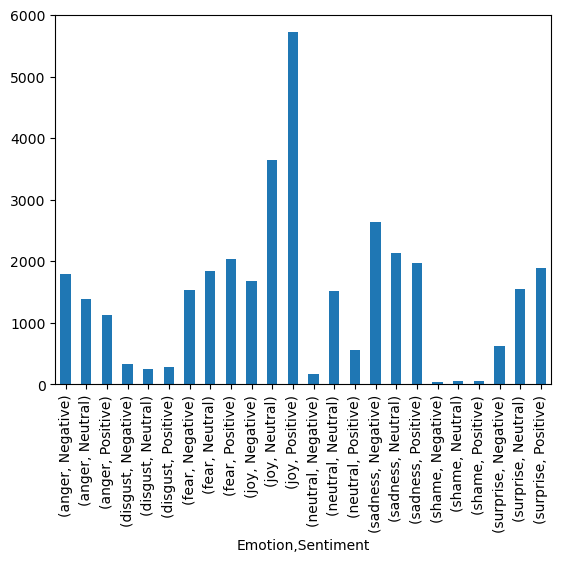

In [83]:
df.groupby(['Emotion','Sentiment']).size().plot(kind='bar')

C:\Users\sreev\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


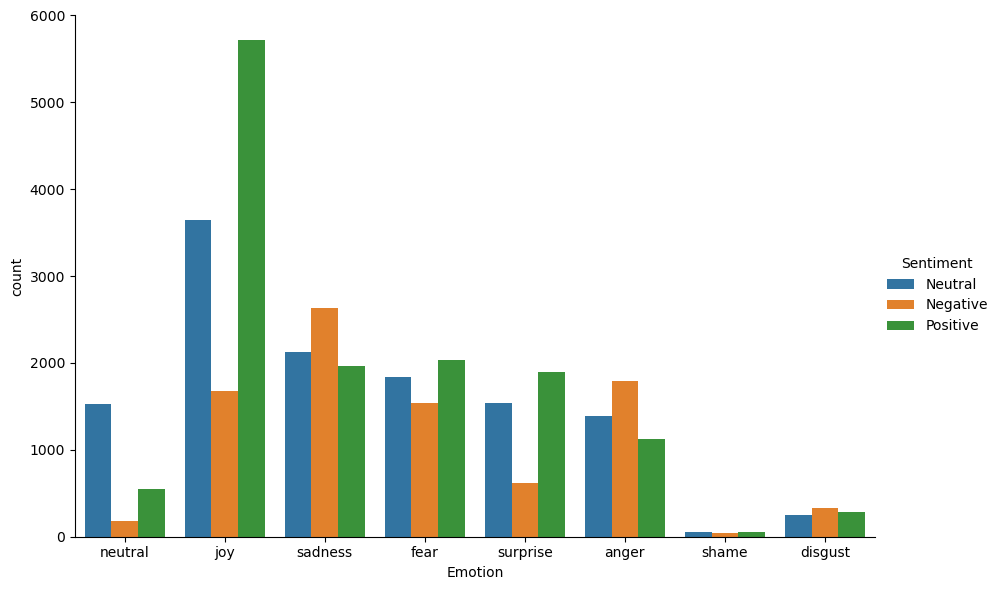

In [84]:
sns.catplot(x='Emotion',hue='Sentiment',data=df,kind='count',height=6,aspect=1.5)


##  Text Cleaning

In [85]:
df['Text']

0                                                   Why ? 
1          Sage Act upgrade on my to do list for tommorow.
2        ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3         Such an eye ! The true hazel eye-and so brill...
4        @Iluvmiasantos ugh babe.. hugggzzz for u .!  b...
                               ...                        
34787    @MichelGW have you gift! Hope you like it! It'...
34788    The world didnt give it to me..so the world MO...
34789                             A man robbed me today . 
34790    Youu call it JEALOUSY, I call it of #Losing YO...
34791    I think about you baby, and I dream about you ...
Name: Text, Length: 34792, dtype: object

In [86]:
df['Clean_text']=df['Text'].apply(nfx.remove_stopwords)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_punctuations)
df['Clean_text']=df['Clean_text'].apply(nfx.remove_userhandles)



In [87]:
df[['Text','Clean_text']]

,Text,Clean_text
0,Why ?,
1,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,A man robbed me today .,man robbed today
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [88]:
df['Clean_text']

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [89]:
df['Emotion']

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

##  Keyword Extraction

In [90]:
from collections import Counter

In [91]:
def extract_keywords(text,num=50):
    tokens=[tok for tok in text.split()]
    most_common_tokens=Counter(tokens).most_common(num)
    return dict(most_common_tokens)

In [92]:
Emotion_list=df['Emotion'].unique().tolist()

In [93]:
Emotion_list

['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame', 'disgust']

In [94]:
joy_list=df[df['Emotion']=='joy']['Clean_text']

In [95]:
joy_docx=' '.join(joy_list)
joy_docx

'Sage Act upgrade list tommorow eye  true hazel eyeand brilliant  Regular features  open countenance  complexion  Oh  bloom health  pretty height size  firm upright figure  health  merely bloom  air  head  glance  hears child  picture health    gives idea complete picture grownup health  loveliness    ugh babe hugggzzz u  babe naamazed nga ako e babe e despite negas mas pinaramdam fil ko ang life  Leopold truly happy : hopes prayers beloved son come fruition  feeling fail french #fuckfrench GoodLet   fell love \\X\\ Overnight felt confidence selfesteem responsible worthwhile terribly ecstatic dangerous thing  selected study university Yeah  ’ ages   passed BA exams class results heard selected fot year university Zambia form Chikola secondary school Welp time study days Heading campus rain grad photos feeling awesome    brings  Ive bought Christmas presents trawl loads shops :) shit pants Pure 100% gravy life  Leopold truly happy : hopes prayers beloved son come fruition  Class jamming

In [96]:
keyword_joy= extract_keywords(joy_docx)
keyword_joy

{'day': 729,
 'amp': 678,
 'time': 602,
 'Im': 555,
 'work': 509,
 'like': 476,
 'today': 471,
 'tomorrow': 467,
 'Christmas': 453,
 'love': 393,
 'happy': 368,
 'good': 345,
 'night': 332,
 'got': 328,
 ':)': 311,
 'going': 304,
 'home': 302,
 'school': 297,
 'morning': 288,
 '2': 262,
 'joy': 257,
 'life': 251,
 'hours': 251,
 'week': 231,
 'feel': 227,
 'year': 225,
 'days': 208,
 'tonight': 205,
 'long': 204,
 'people': 201,
 'me': 196,
 'great': 194,
 'sleep': 185,
 'new': 181,
 'family': 181,
 's': 180,
 'God': 177,
 'know': 177,
 'hour': 172,
 'friend': 169,
 'felt': 167,
 'cant': 165,
 'it': 162,
 'feeling': 159,
 'RT': 159,
 'friends': 155,
 'think': 148,
 'excited': 145,
 'right': 142,
 'class': 141}

In [97]:
def plot_most_common_words(mydict,emotion_name):
    df_01= pd.DataFrame(mydict.items(),columns=['token','count'])
    plt.figure(figsize=(20,10))
    sns.barplot(x='token',y='count',data=df_01)
    plt.title('Plot of {} Most Common Words'.format(emotion_name))
    plt.xticks(rotation=45)
    plt.show()

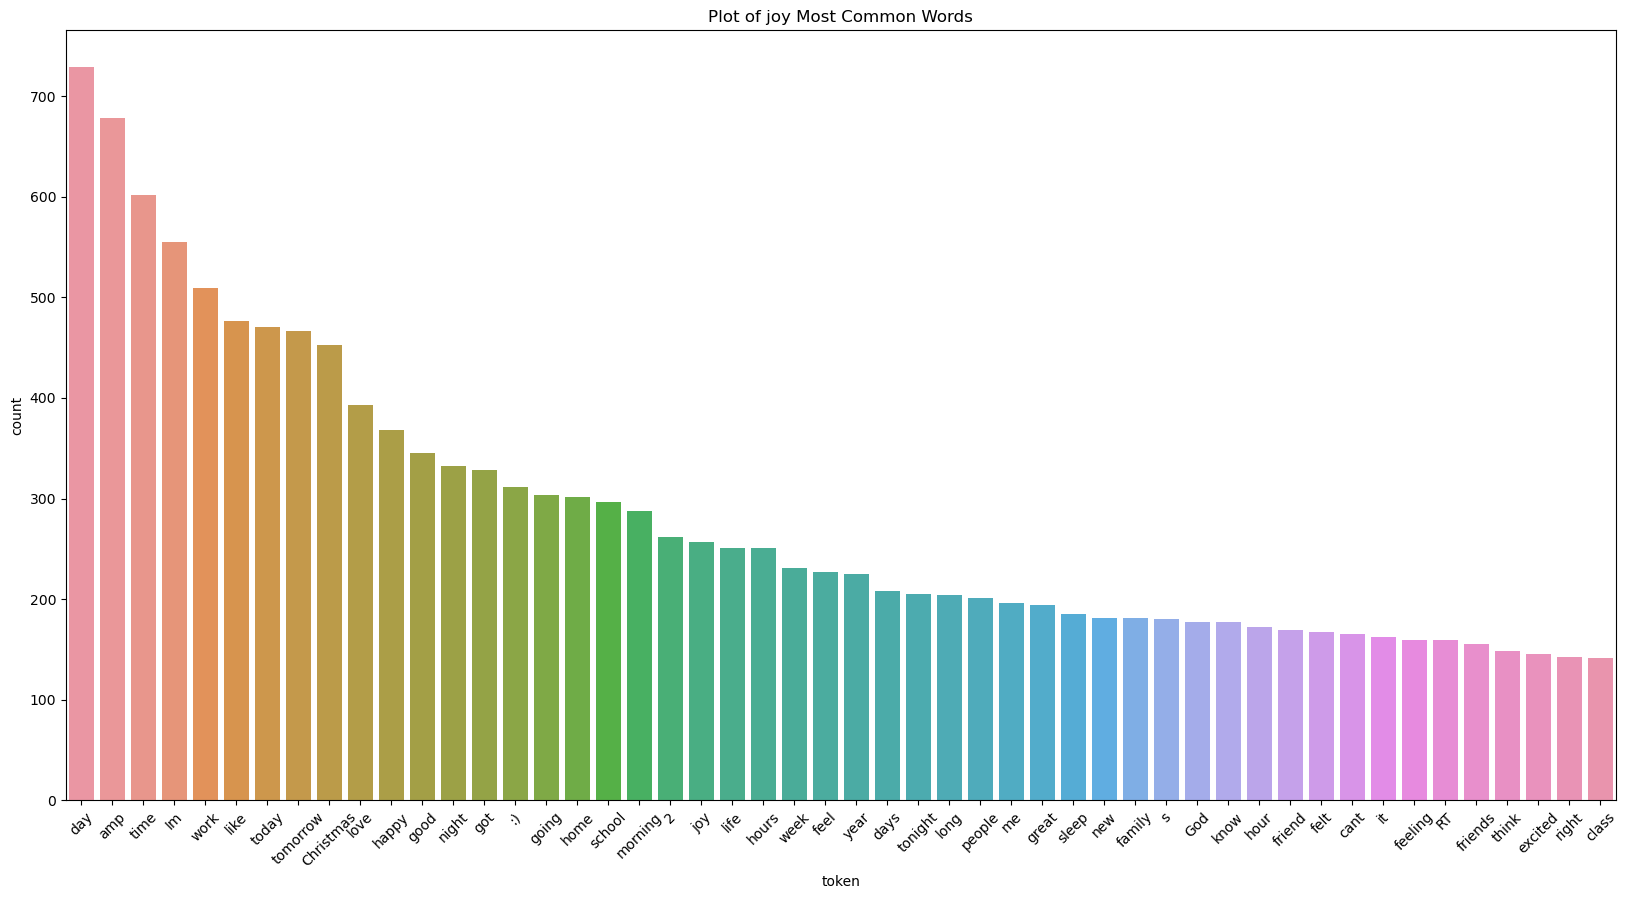

In [98]:
plot_most_common_words(keyword_joy,'joy')

In [99]:
 ## Surprise List

In [100]:
surprise_list=df[df['Emotion']=='surprise']['Clean_text'].tolist()

surprise_docx = ' '.join(surprise_list)

keyword_surprise = extract_keywords(surprise_docx)
keyword_surprise

{'en': 299,
 'een': 294,
 'de': 251,
 'Im': 227,
 ':)': 201,
 'know': 165,
 'home': 160,
 'van': 153,
 'today': 150,
 'day': 143,
 'ik': 137,
 'nog': 126,
 'love': 126,
 'got': 126,
 'met': 125,
 'amp': 124,
 'RT': 124,
 'time': 120,
 'like': 117,
 'voor': 116,
 'going': 116,
 'surprise': 114,
 'je': 110,
 'tomorrow': 105,
 'good': 101,
 'birthday': 101,
 'wait': 97,
 'het': 96,
 'night': 93,
 'actually': 93,
 'coming': 92,
 'lol': 89,
 'dan': 87,
 'Christmas': 84,
 'mom': 83,
 'u': 82,
 'think': 80,
 'friends': 79,
 'op': 76,
 'la': 74,
 ')': 74,
 '5': 73,
 'new': 72,
 'thought': 70,
 'best': 70,
 'special': 69,
 'school': 69,
 '2': 69,
 'work': 68,
 'people': 68}

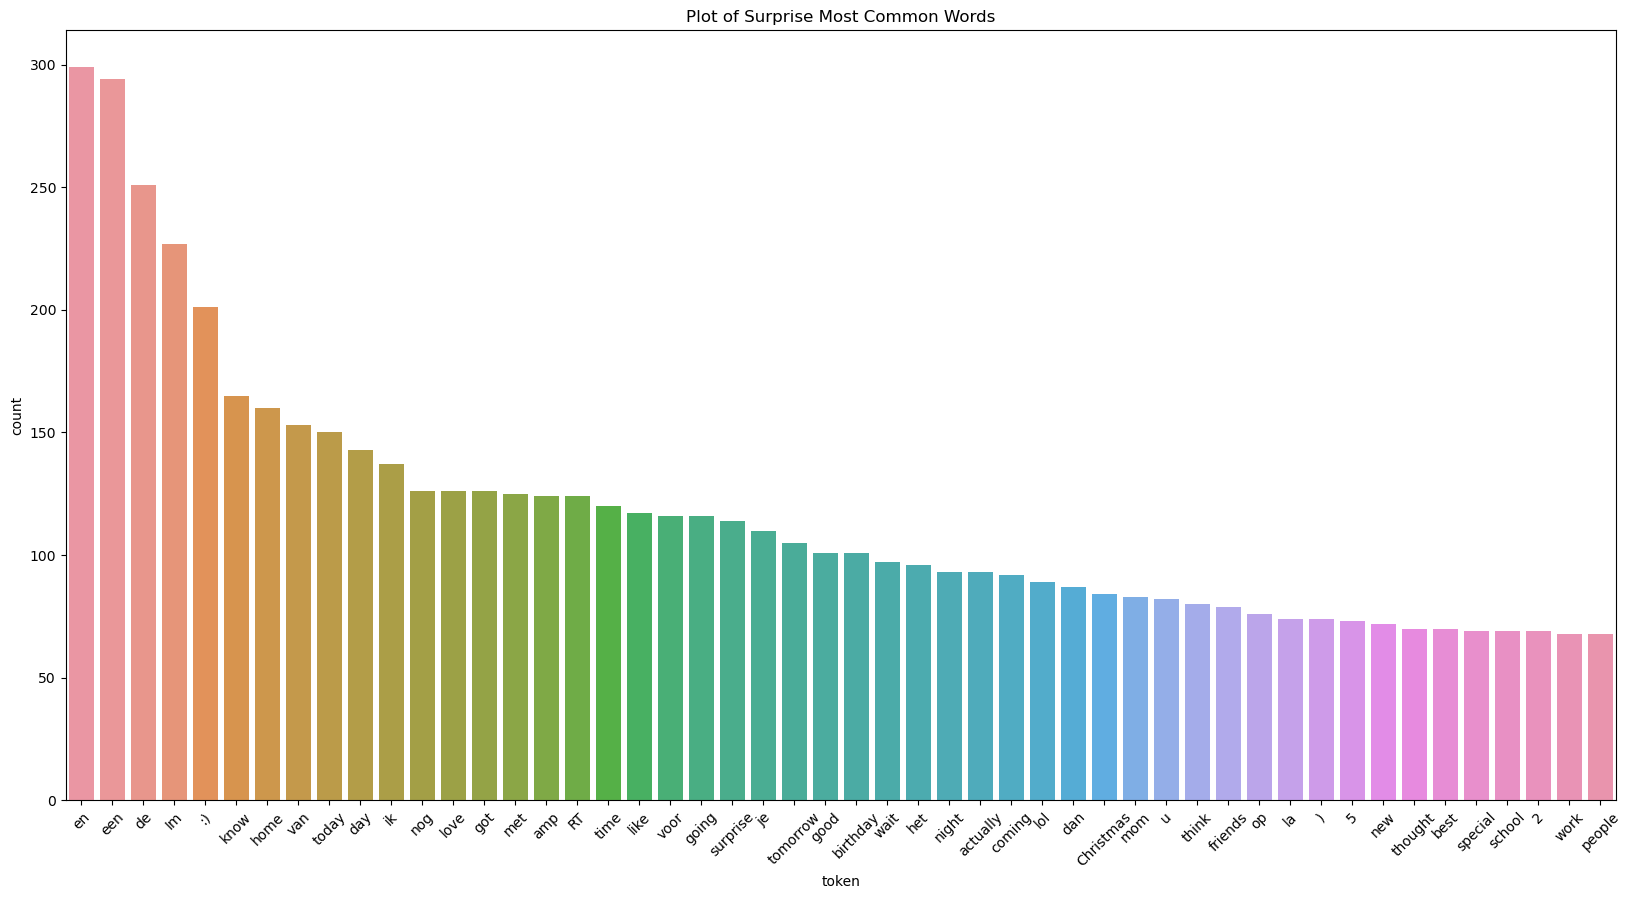

In [101]:
plot_most_common_words(keyword_surprise,'Surprise')

In [102]:
from wordcloud import WordCloud

In [103]:
def plot_word_cloud(docx):
    wordcloud = WordCloud().generate(docx)
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()
    

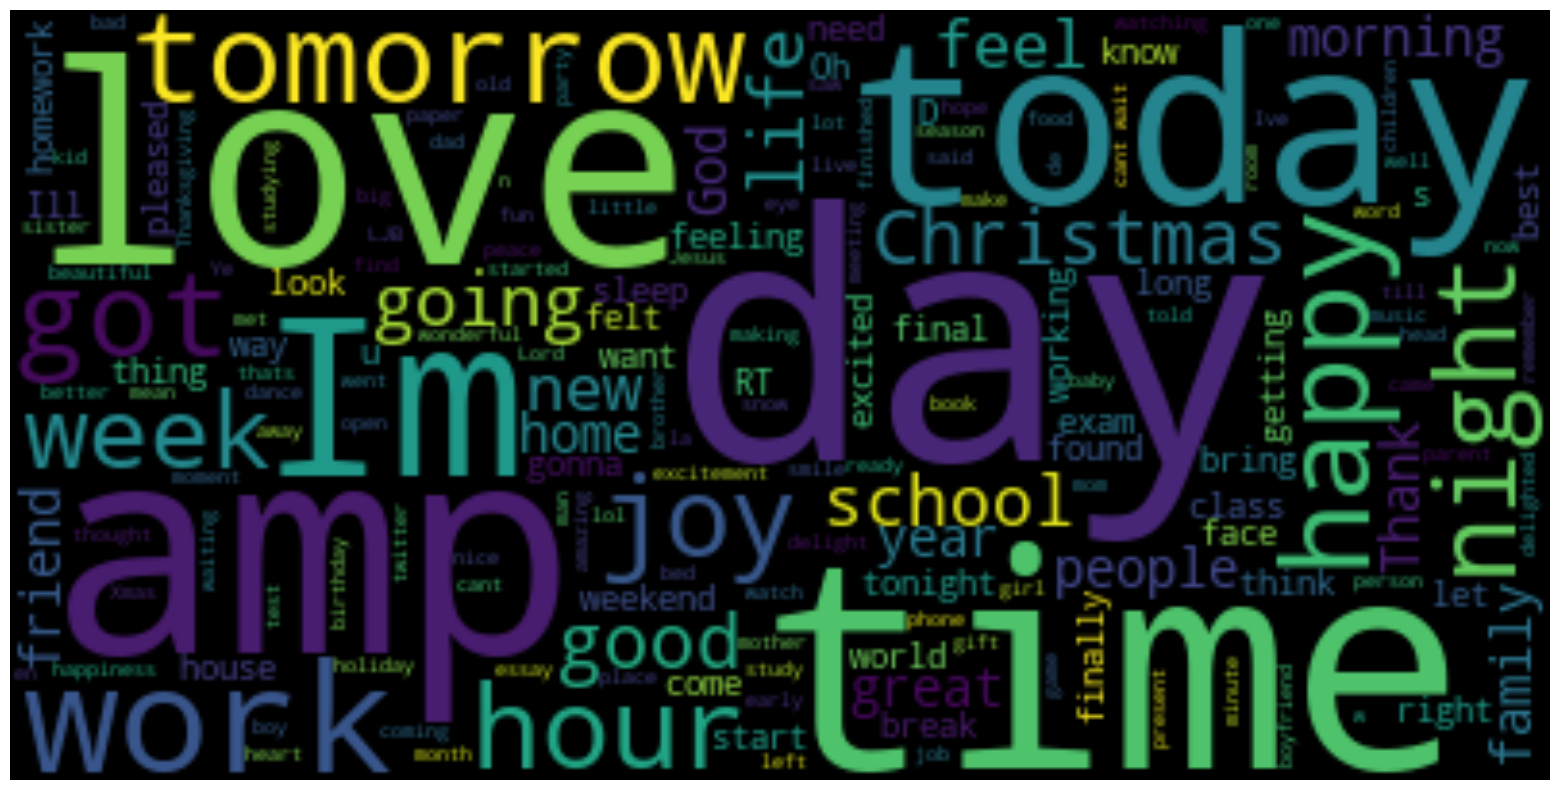

In [104]:
plot_word_cloud(joy_docx)

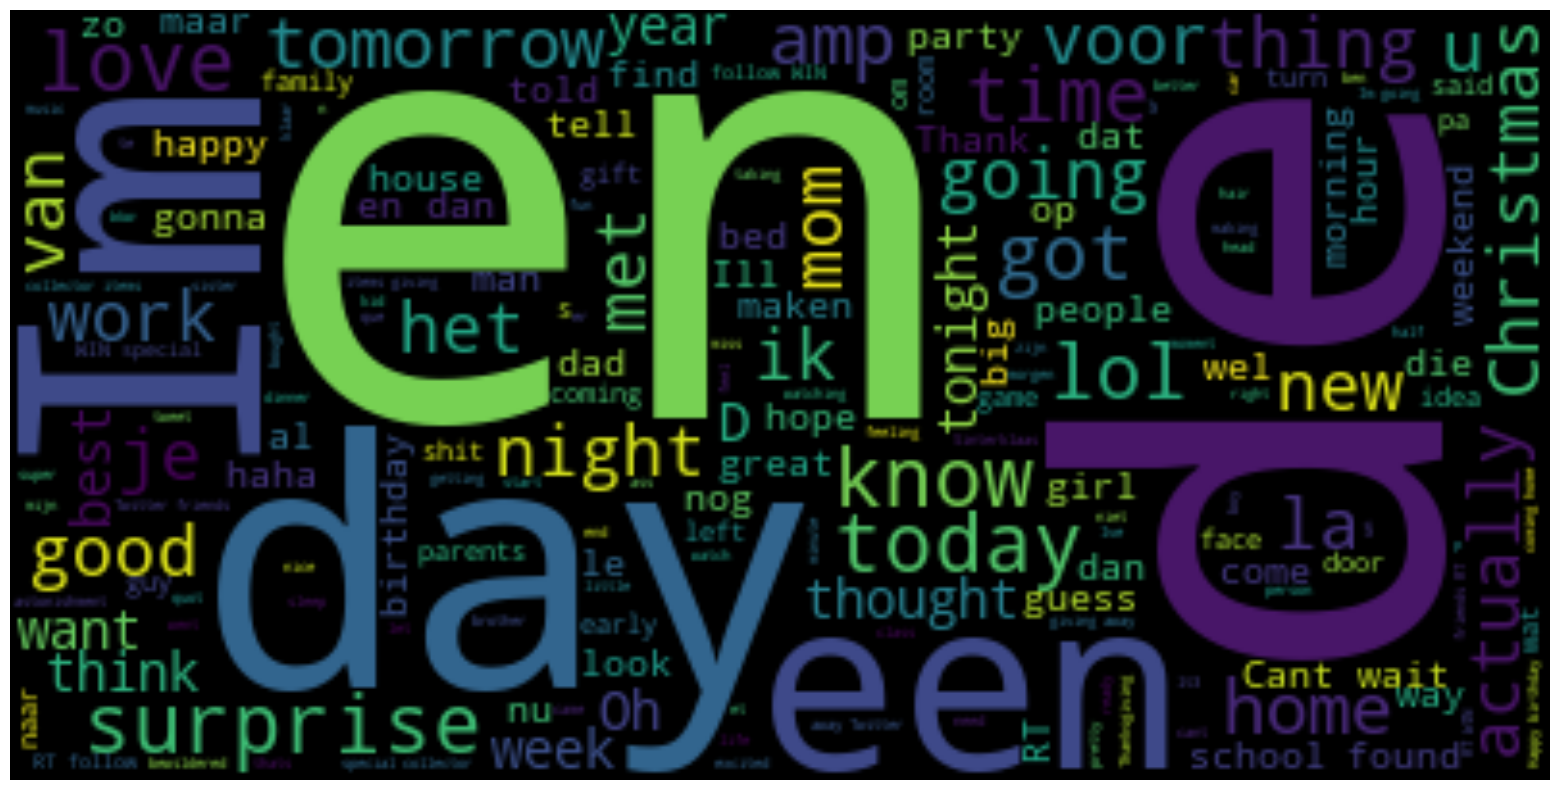

In [105]:
plot_word_cloud(surprise_docx)


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,confusion_matrix

from sklearn.model_selection import train_test_split

In [109]:
Xfeatures=df['Clean_text']
ylabel=df['Emotion']

In [110]:
print(Xfeatures.shape)
print(ylabel.shape)

(34792,)
(34792,)


In [111]:
Xfeatures = Xfeatures.dropna()
Xfeatures

0                                                         
1                           Sage Act upgrade list tommorow
2        WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3        eye  true hazel eyeand brilliant  Regular feat...
4          ugh babe hugggzzz u  babe naamazed nga ako e...
                               ...                        
34787           gift Hope like it hand wear  Itll warm Lol
34788           world didnt meso world DEFINITELY cnt away
34789                                    man robbed today 
34790                            Youu JEALOUSY #Losing YOU
34791                                think baby dream time
Name: Clean_text, Length: 34792, dtype: object

In [128]:

ylabel

0         neutral
1             joy
2         sadness
3             joy
4             joy
           ...   
34787    surprise
34788         joy
34789       anger
34790        fear
34791     sadness
Name: Emotion, Length: 34792, dtype: object

In [129]:
cv=CountVectorizer()
X=cv.fit_transform(Xfeatures)

In [130]:
cv.get_feature_names_out()

array(['00', '000', '000ème', ..., 'ღƪ', 'ℕoíʀ', 'ㄒʜℰℳℰ'], dtype=object)

In [133]:
X_train,X_test,y_train,y_test=train_test_split(X,ylabel,test_size=0.3,random_state=42)

In [142]:
print(len(y_test))
print(len(y_train))

10438
24354


# Building the Model


In [143]:
nv_model=MultinomialNB()
nv_model.fit(X_train,y_train)

MultinomialNB()

In [144]:
nv_model.score(X_test,y_test)

0.5642843456600881

In [145]:
y_pred_for_nv=nv_model.predict(X_test)

In [147]:
y_pred_for_nv

array(['fear', 'sadness', 'sadness', ..., 'sadness', 'anger', 'sadness'],
      dtype='<U8')

In [169]:
sample=["Iam drowning"]

In [152]:
vect=cv.transform(sample).toarray()

In [153]:
nv_model.predict(vect)

array(['joy'], dtype='<U8')

In [154]:
nv_model.predict_proba(vect)

array([[1.75247256e-02, 2.53461784e-03, 1.49862493e-01, 6.09603654e-01,
        6.35518448e-03, 1.22623596e-01, 4.67467367e-05, 9.14489824e-02]])

In [155]:
nv_model.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype='<U8')

In [156]:
np.max(nv_model.predict_proba(vect))

0.6096036543071133

In [161]:
def predict_emotion(text,model):
    my_vect=cv.transform(text).toarray()
    prediction=model.predict(my_vect)
    pred_proba=model.predict_proba(my_vect)
    pred_percentage_for_all=dict(zip(model.classes_,pred_proba[0]))
    print('prediction:{}, prediction Score{}'.format(prediction[0],np.max(pred_proba)))
    return pred_percentage_for_all

In [170]:
predict_emotion(sample,nv_model)

prediction:fear, prediction Score0.5204639785242082


{'anger': 0.05979462173041668,
 'disgust': 0.025279217563104764,
 'fear': 0.5204639785242082,
 'joy': 0.12282690346116239,
 'neutral': 0.07490830487299319,
 'sadness': 0.13473689428377514,
 'shame': 0.006061021035169742,
 'surprise': 0.05592905852917032}